# Анализ гипотез интернет-магазина

В проекте две части.

В первой - проведем приоритезацию гипотез. Будем использовать фреймворки ICE и RICE. В результате: определим те гипотезы, которые стоит проверить в первую очередь, и те, что можно не проверять совсем.

Во второй части проанализируем результаты A/B теста:
- рассмотрим кулумятивные показатели выручки, среднего чека и конверсии;
- найдем посетителей сайта с аномально высоким чеком и большим количеством заказов;
- проверим гипотезы о равенстве конверсий и средних чеков в группах A и B.

## Приоритезация гипотез

### Предобработка данных

Загрузим необходимые библиотеки и исходные данные

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

Посмотрим на наш датафрейм

In [3]:
# отображаем первую колонку полностью
pd.set_option('display.max_colwidth', 0)

df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Reach,9.0,4.777778,3.153481,1.0,3.0,3.0,8.0,10.0
Impact,9.0,4.777778,3.192874,1.0,3.0,3.0,7.0,10.0
Confidence,9.0,5.555556,3.045944,1.0,3.0,7.0,8.0,9.0
Efforts,9.0,4.888889,2.803767,1.0,3.0,5.0,6.0,10.0


- Датафрейм небольшой - всего 9 строк;
- Из названий столбцов можно было бы убрать заглавные буквы, но задачи, которые мы будем дальше решать, этого не требуют.
- Пропусков в данных нет;
- Значения распределены от 0 до 10, что тоже соответствует применению фреймворков ICE/RICE;
- С типами переменных тоже все в порядке.

### Приоритетность по ICE

In [6]:
df['ICE'] = df['Impact'] * df['Confidence'] / df['Efforts']

In [7]:
df[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


ТОП-3 приоритетные гипотезы, согласно расчету по ICE:
1. Запустить акцию, дающую скидку на товар в день рождения;
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

### Приоритетность по RICE

In [8]:
df['RICE'] = df['Reach'] * df['Impact'] * df['Confidence'] / df['Efforts']

df[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


ТОП-3 приоритетные гипотезы, согласно расчету по RICE:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
3. Две гипотезы оказались равными по приоритетности:
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; 
    - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Выводы по приоритетности гипотез:
1. Есть две гипотезы, вошедшие в ТОП-3 по приоритетности как по расчету ICE, так и по расчету RICE:
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
   Стоит отметить, что вторая из них абсолютный лидер по RICE и всего третья по ICE. Это связано с тем, что расчет RICE учитывает охват, а он у этой гипотезы наибольший.
2. При расчете ICE гипотеза "Запустить акцию, дающую скидку на товар в день рождения" достаточно ярко выраженный лидер по приоритетности. Это обусловлено высокими показателями влияния на охватываемых пользователей и увереннностью в ней при относительно низких затратах. Однако ее охват минимальный.
3. Согласно расчетам, можно рекомендовать для проверки в первую очередь гипотезы:
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
4. При наличии ресурсов также для проверки можно рассмотреть гипотезы:
    - Запустить акцию, дающую скидку на товар в день рождения;
    - Добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа.

## Анализ A/B теста

### Загрузка и предобработка исходных данных

Загрузим данные с результатами A/B теста. 

Один файл с информацией о заказах. Второй - с информацией о количестве пользователей за каждую дату.

In [9]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

Посмотрим на первый датафрейм

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


- Названия столбцов можно было бы привести к змеиному регистру, но задачи, которые мы будем дальше решать, этого не требуют.
- Пропусков в данных нет;
- Типы переменных верные, но столбец с датой лучше принудительно приведем к нужному формату.

In [12]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Посмотрим, нет ли в исходных данных дубликатов. 

In [13]:
orders.duplicated().sum()

0

Ни одного дубликата.

Теперь сделаем первичную обработку датафрейма с группами пользователей.

In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


- Пропусков в данных нет;
- Типы переменных верные, но столбец с датой здесь тоже принудительно приведем к нужному нам формату.

In [16]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Посмотрим, нет ли дубликатов.

In [17]:
visitors.duplicated().sum()

0

Дубликатов нет.

Рассмотрим более детально пользователей: сколько их всего в каждой группе.

In [18]:
print('Всего уникальных пользователей - {}'.format(orders['visitorId'].nunique()))
print('Кол-во уникальных пользователей в группе A - {}'.format(orders[orders['group'] == 'A']['visitorId'].nunique()))
print('Кол-во уникальных пользователей в группе B - {}'.format(orders[orders['group'] == 'B']['visitorId'].nunique()))

Всего уникальных пользователей - 1031
Кол-во уникальных пользователей в группе A - 503
Кол-во уникальных пользователей в группе B - 586


В группе B на 83 уникальных пользователя больше, чем в группе A. Смотрится, как будто что-то не так и нужно делать выборки равных размеров. Но на наш дальнейший анализ это вряд ли повлияет, так как обе группы являются вполне репрезентативными для оценки среднего.

Посмотрим, нет ли пользователей, которые попали и в группу A, и в группу B.

In [19]:
ab_users = set(orders[orders['group'] == 'A']['visitorId'].unique()) & set(orders[orders['group'] == 'B']['visitorId'].unique())
len(ab_users)

58

Оказывается, у нас есть целых 58 пользователей, которые оказались и в той, и в другой группе. Это неправильно, так как с момента начала теста каждый пользователь должен четко определяться либо в одну, либо в другую группу, потому что мы хотим понять, как изменение в нашем магазине повлияло на среднестатистического пользователя. 

В реальной ситуации, думаю, можно было бы пообщаться с коллегами и выяснить, почему так случилось. А в нашем случае, придется просто удалить таких пользователей из обеих групп, чтобы они не искажали результаты нашего дальнейшего анализа.

С датафреймом orders - все хорошо, отфильтруем по visitorId.
С датафреймом visitors мы ничего сделать не сможем, так как visitorId в нем отсутствует.

In [20]:
orders = orders[-orders['visitorId'].isin(ab_users)]

### Расчет кумулятивной выручки по группам

*Чистосердечное признание: скопировал из урока код и часть комментариев. Оставляю, как есть, чтобы спустя время можно было разобраться*

Создадим массив уникальных пар значений дат и групп теста

In [21]:
datesGroups = orders[['date','group']].drop_duplicates()

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups. 

Затем агрегируем значения. Вычислим максимальную дату. 

Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:

`.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'})`.

Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group'

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов:

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

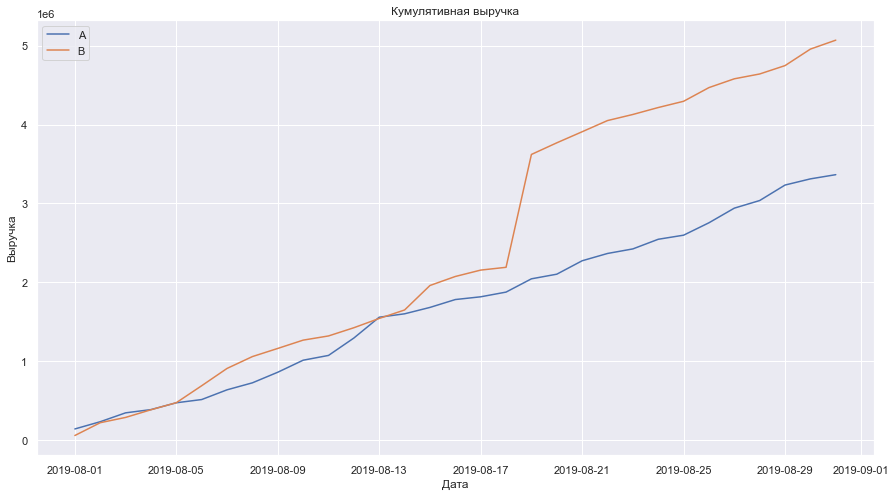

In [25]:
# установка размеров графика
sns.set(rc={'figure.figsize':(15,8)})

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

***Вывод по кумулятивной выручке***

Напротяжении всего теста наблюдается равномерный рост выручки в обеих группах. Однако в группе B после 17 августа случился резкий рост. Возможно, несколько пользователей совершили особенно крупные покупки, а может быть, это и вовсе был один пользователь с огромным чеком. 

### Расчет кумулятивного среднего чека

Построим графики кумулятивного среднего чека группам A/B-тестирования

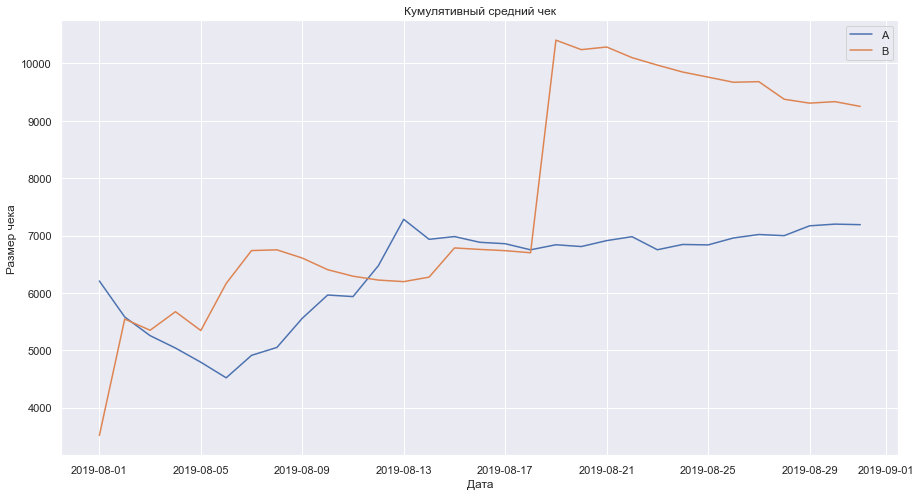

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.ylabel('Размер чека')
plt.show()

***Выводы по кумулятивному среднему чеку:***

- В группе A заметен ощутимый спад размера среднего чека с 1 по 5 августа. 9 августа средний чек вернулся к своим начальным значениям. 13 августа был небольшой рост с дальнейшим возвращением к начальным показателям, после чего средний чек в группе A держался стабильно.
- В группе B средний чек постоянно менялся, но в целом можно сказать, что с начала теста и до 17 августа демонстрировал рост. 18 августа, как мы предпоалагаем, случилась какая-то большая покупка (или несколько покупок), в результате чего средний чек резко подскочил вверх. После чего средний чек  в группе B уменьшался, возвращаясь к своим истистинным значениям (без учета аномально больших покупок).

### Относительное различие среднего чека между группами

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»)

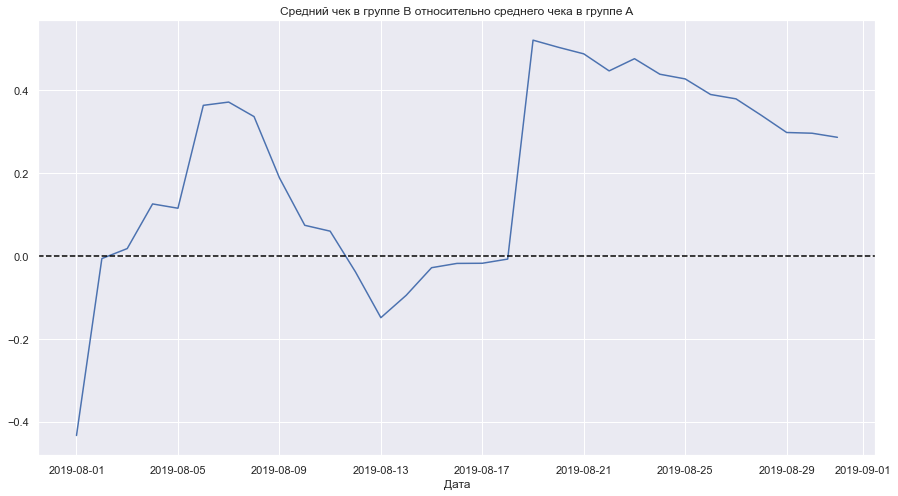

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Средний чек в группе B относительно среднего чека в группе A')
plt.xlabel('Дата')
plt.show()

***Выводы по относительному различию среднего чека:***

По графику видно, что почти во все дни проведения теста средний чек в группе B был выше. Однако есть дни довольно резких изменений.

1. 1 августа - первый день теста.
2. 8 августа - как раз когда средний чек в группе А показал небольшой краткострочный рост с возвращением к начальным значениям.
3. 18 августа - когда была совершена аномально большая покупка в группе B.

### Кумулятивная конверсия

Аналогично проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x - [0, 0.05]

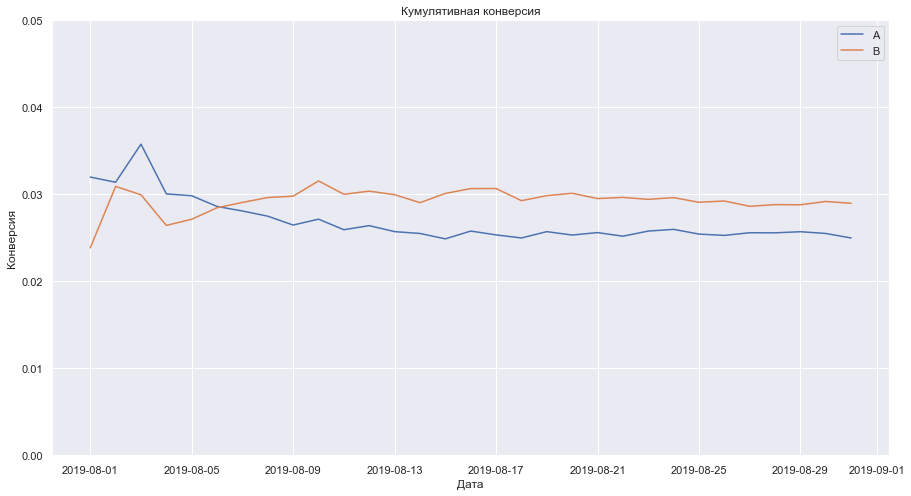

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.ylabel('Конверсия')

# задаем масштаб оси x
plt.ylim([0, 0.05])
plt.show()

***Выводы по конверсиям в группах:***

Первые пять дней теста конверсии групп колебались. 

После 5 августа и до 9 августа конверсия группы A уменьшалась, а в группе B - наоборот росла. После 9 августа конверсии в группах держались стабильно.

### Конверсия в группе B относительно группы A

Построим график относительного изменения кумулятивной конверсии группы B к группе A:

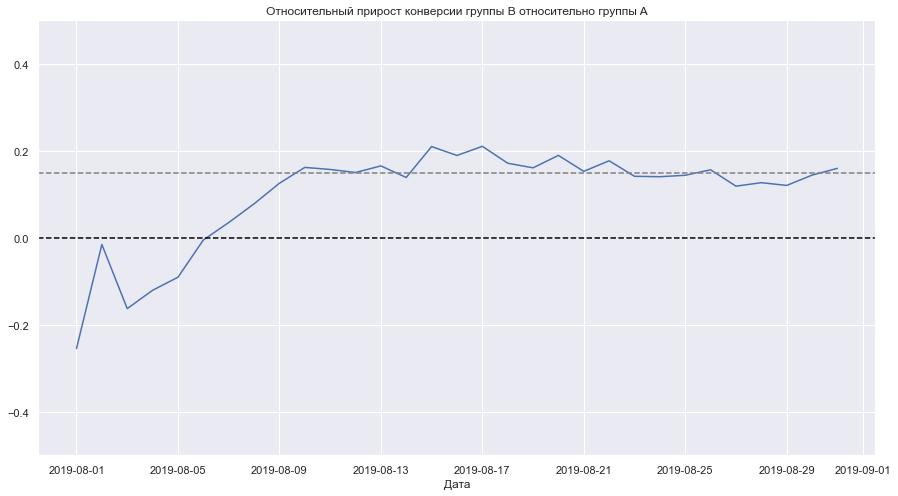

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.ylim([-0.5, 0.5])
plt.show()

***Выводы по относительной конверсии:***

Можно сказать, что первые 5 дней теста группа B проигрывала группе A по конверсии. Однако после 5 августа ситуация изменилась - конверсия группы B стала стабильно выше. Скорее всего, значения конверсий в группах после 9 августа стабилизировались - конверсия в группе B в среднем была стабильно выше конверсии в группе A на 15%.

### Точечный график количества заказов по пользователям 

Построим  точечный график количества заказов по пользователям.

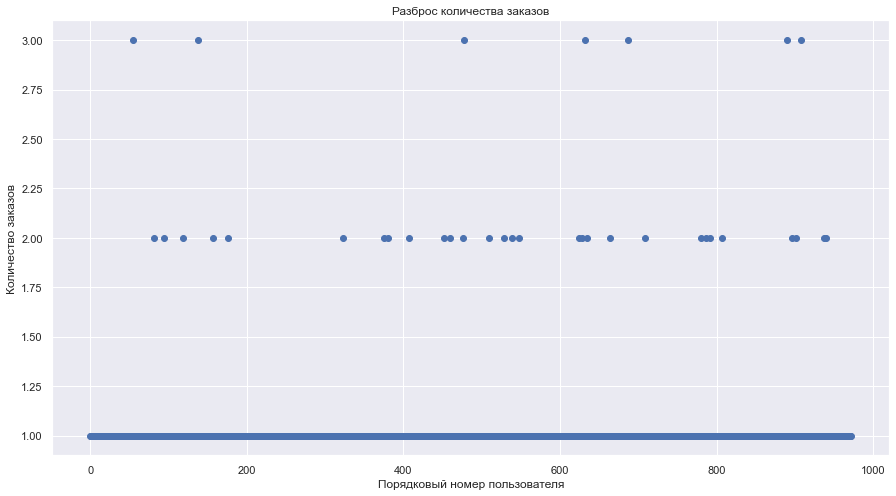

In [30]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Разброс количества заказов')
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Количество заказов')
plt.show()

Пользователи, ожидаемо, совершали 1-2 заказа. Есть несколько выбивающиеся пользователи, совершивших 3 заказа. Посмотрим на 95-й и 99-й процентили.

In [31]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


***Вывод:***

Всего 5% пользователей совершили больше 1 заказа, и всего 1% - больше 2. Чуть позже пожертвуем этим одним процентом, отфильтровав аномально высокие значения.  

### Точечный график стоимости заказов

Теперь построим точечный график стоимостей заказов.

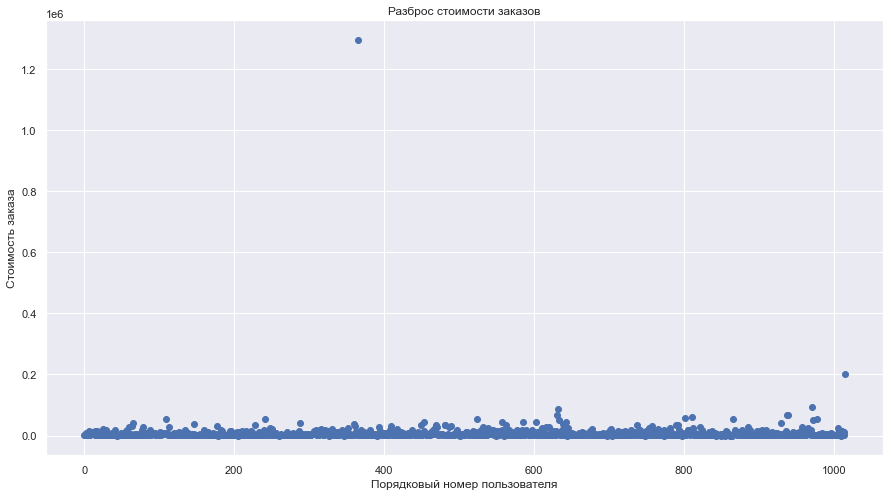

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Разброс стоимости заказов')
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Стоимость заказа')
plt.show()

Рассмотрим более подробно суммы заказов большинства покупателей, исключив "аномалии".

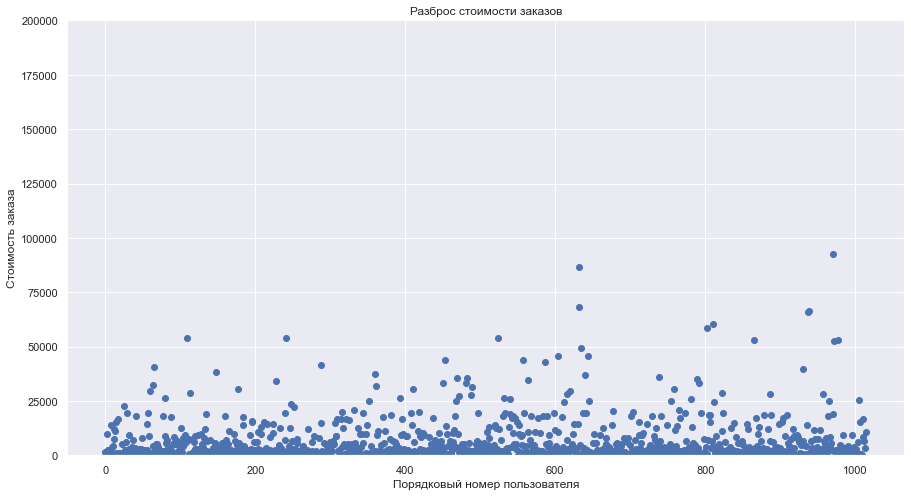

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Разброс стоимости заказов')
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Стоимость заказа')
plt.ylim([0,200000])
plt.show()

***Выводы:***

Есть два сильно выбивающихся заказа. Один - отличается от остальных в разы: больше 1.2 млн. Еще один - на 200 тысяч - отличается от остальных не сильно, но все же выделяется. 

Исключив их, видим, что абсолютное большинство заказов было до 50 тысяч.  

Посмотрим на 95-й и 99-й процентили стоимости заказов.

In [34]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Всего 1% заказов больше 53904. Поэтому чуть позже для корректного анализа теста уберем этот 1% из наших данных.

### Проверка гипотезы о разнице конверсий по сырым данным

**Нулевая гипотеза:** различий в конверсиях между группами нет. 

**Альтернативная гипотеза**: различия в конверсиях между группами есть.

**Уровень значимости α** примем равным 0,05.

В нашем случае конверсия - это отношение количества заказов к количеству пользователей в группе. Поэтому чтобы оценить разницу в конверсиях между группами A и B, мы будем сравнивать среднее количество заказов на одного пользователя в этих группах. 

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами userId и orders. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Эти переменные должны состоять из двух частей:
1. Список с количеством заказов для каждого из пользователей.
2. Нули для пользователей, которые ничего не заказывали.

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

С помощью критерия Манна-Уитни проверим гипотезу о равенстве средних значений в получившихся выборках.

Также посчитаем прирост конверсии в группе B относительно группы A.

In [37]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Прирост конверсии в группе B относительно группы A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.007
Прирост конверсии в группе B относительно группы A: 0.171


В среднем, конверсия во группе B по сырым данным на 17% выше, чем в группе A. Причем согласно критерию Манна-Уитни, эту разницу при уровне значимости α=0.05 можно считать статистически значимой. 

***Вывод:*** по сырым данным отвергаем нулевую гипотезу о том, что разницы в конверсиях между группами нет.

### Проверка гипотезы о разнице в средних чеках

Теперь проверим статистическую значимость различий в среднем чеке. 

**Нулевая гипотеза:** различий в среднем чеке между группами нет. 

**Альтернативная гипотеза:** различия в среднем чеке между группами есть.

In [38]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('Прирост среднего чека в группе B относительно группы A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.829
Прирост среднего чека в группе B относительно группы A: 0.287


Несмотря на то, что средний чек у группе B почти на 29% превышает средний чек в группе A, p-value значительно выше принятого нами уровня значимости. Следовательно, разница в средних чеках не является значимой и могла быть получена случайно. 

***Вывод:*** 

По сырым данным отвергнуть нулевую гипотезу о равенстве средних чеков в группах A и B мы не можем. 

### Проверка гипотезы о разнице в конверсиях по "очищенным" данным 

Теперь отфильтруем наши данные: уберем из них пользователей, которые совершили больше 2 заказов, и тех, чей чек превышает 53904.

In [39]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


Всего 16 пользователей совершили аномально дорогие покупки и/или аномально много заказов.

Посмотрим изменяться ли наши выводы о конверсии, если убрать таких пользователей из нашей выборки.

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("Прирост конверсии в группе B относительно группы A: {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value = 0.005
Прирост конверсии в группе B относительно группы A: 0.201


Если не учитывать пользователей с аномально большим количеством заказов и/или аномально высокими чеками, то конверсия в группе B выше конверсии в группе A на 20%. И эту разницу можно считать статистически значимой при принятом нами уровне значимости α=0.05. 

***Вывод:*** 

По очищенным данным мы тоже отвергаем нулевую гипотезу о том, что разницы в конверсиях между группами нет. 

Надо подчеркнуть, что если бы мы выбрали **более строгий уровень значимости α=0.01**, то нулевая гипотеза была бы также отвергнута и полученная разница в конверсиях в 20% считалась бы статистически значимой. 

### Проверка гипотезы о разнице в средних чеков по "очищенным" данным 

Теперь посмотрим, изменятся ли выводы о среднем чеке после фильтрации данных.

In [41]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Прирост среднего чека в группе B относительно группы A: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.788
Прирост среднего чека в группе B относительно группы A: -0.032


Если судить по очищенным данных, то средний чек в группе B стал даже на 3.2% ниже, чем в группе A. Однако эту разницу при таком большом значении p-value нельзя считать статистически значимой. Следовательно, эта разница могла быть получена случайно.

Теперь очевидно, что при отсутствии фильтрации данных на средний чек в группе B огромное влияние оказывал заказ на 1.2 млн.

***Вывод:*** 

По очищенным данным принимаем нулевую гипотезу об отсутствии разницы средних чеков между группами.

## Общие выводы

- Есть статистически значимое различие конверсий между группами. Причем по сырым данным конверсия в группе B больше, чем в группе A, почти на 17%, а по очищенным - на 20%;
- Относительный прирост конверсии в группе B к конверсии в группе A в последние дни теста стабильно зафиксировался на уровне 15%;
- По сырым данным средний чек в группе B на 29% выше, чем в группе A. По очищенным данным такой разницы уже не наблюдается - средний чек в группе B даже на 3.2% ниже, чем в группе A. Это обусловлено попаданием в группу B "аномального" заказа на 1.2 млн при том, что чек у 99% заказов менее 53 тысяч;
- Ни по сырым, ни по очищенным данным вывода о статистически значимой разнице в среднем чеке между группами A и B мы сделать не можем, так как полученные по критерию Манна-Уитни значения p-value значительно превышают принятый уровень значимости;
- Тест можно остановить со следующими выводами: 
    - конверсия в группе B выше конверсии в группе A на 20%;
    - статистически значимой разницы в среднем чеке между группами нет;
- Победа за группой B: средний чек не изменился, но конверсия в покупателей увеличилась - а это, как минимум, должно положительно сказаться на выручке на магазина.